# Neurona de McCulloch y Pitts
Este modelo de neurona se usó mucho tiempo pero al día de hoy ya no es útil, pero para entender como funciona una neurona es un buen ejemplo.

## Implementación de la MPNeuron

In [1]:
# Esta sería la implementación de sus funciones y el algoritmo, pero hoy en día para la mayoría de
# cosas que se hacen con AI, se utilizan librerías y frameworks que ya tienen sus funciones o métodos
# implementados y además ya se encuentran implementados de manera optimizada.
# Por ello tardan menos en entrenarse o procesar una predicción, etc.

import numpy as np

# Implementación de la clase que representa la neurona
class MPNeuron:

  def __init__(self):
    # Se define su atributo "threshold"
    self.threshold = None

  def model(self, x):
    # Esta va a ser la función hipótesis o el algoritmo de ésta neurona artificial
    # Este metodo recibe una entrada "X" que va a consistir en un conjunto de valores
    # binarios, ej: [1, 0, 1, 0]. Es una lista de python y la cantidad va a ser igual a
    # la cantidad de características de entrada que le proporcionemos ej: [x1, x2,..., xn].

    # Acá lo que se hace es sumar cada uno de esos valores con "sum(x)". Esta sería la función "Z"
    # del ejemplo en la docu de la pregunta si "Hoy voy al cine".
    # Luego se compara con el "threshold" para ver si devuelve si o no.
    return (sum(x) >= self.threshold)

  def predict(self, X):
    # Este modelo es por la necesidad de que la neurona pueda realizar varias predicciones simultáneas, es decir
    # es como si yo respondiese esas preguntas de diferente forma. Es decir, como si tuviese varios vectores de entrada y quisiese evaluar
    # todas esas posibilidades. Es como si el "input" en lugar de ser un único vector, fuese una lista de listas o un vector de vectores,
    # ej: input: [ [1, 0, 1, 0], [x1, x2,..., xn] ]
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)

    return np.array(Y)

In [2]:
# Instanciamos la neurona
mp_neuron = MPNeuron()

In [3]:
# Establemecom un threshold
mp_neuron.threshold = 3

In [4]:
# Evaluamos diferentes casos de uso. Y le paso las respuestas a las cuatro preguntas del ejemplo de "Voy a ir al cine"
# donde en la primera lista sólo la primera pregunta es afirmativa, en el segundo caso todas son afirmativas y en el tercero
# sólo 3 de las preguntas son afirmativas
mp_neuron.predict( [ [1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 0] ] )

array([False,  True,  True])

## Caso Práctico: Diagnóstico de Cancer de mama
Esta es una copia de los conjuntos de datos de UCI ML Breast Cancer Wisconsin (Diagnóstico). https://goo.gl/U2Uwz2

Las características de entrada se calculan a partir de una imagen digitalizada de un aspirado de aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

El plano de separación descrito anteriormente se obtuvo utilizando el método de árbol de múltiples superficies (MSM-T) [K. P. Bennett, "Construcción de un árbol de decisión mediante programación lineal". Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], un método de clasificación que utiliza la programación lineal para construir un árbol de decisión. Los rasgos relevantes se seleccionaron mediante una búsqueda exhaustiva en el espacio de 1-4 rasgos y 1-3 planos de separación.

El programa lineal real utilizado para obtener el plano de separación en el espacio tridimensional es el que se describe en: [K. P. Bennett y O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Esta base de datos también está disponible a través del servidor ftp UW CS:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

### Referencias

* W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
* O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

### 2.3. Lectura del conjunto de datos
La mayoría de las redes neuronales que vamos a ver, se catalogan dentro de las técnicas de **Aprendizaje Supervisado** por lo tanto para éste ejemplo vamos a usar un **Conjunto de Datos** con características de entrada sobre diferentes tumores y además contiene una catalogación o etiquetas que nos indica si ese tumor es maligno o beningo.
La idea con ésto es utilizar estre conjunto de datos que ya está catalogado, en el que ya se sabe que tumores son beningos y cuales son malignos, para tratar de ajustar nuestro **Threshold** al de nuestra red neuronal de la mejor manera posible.

In [6]:
# Lectura del Conjunto de datos

# Se importa el conjunto de datos en el contexto de Jupiter Notebook y lo sacamos de
# "Scikit Learn" (https://scikit-learn.org/stable/index.html) que es una de las librerías más populares
# que se usa para la implementación de algoritmos de machine learning.
from sklearn.datasets import load_breast_cancer

# Obtenemos el conjunto de datos en la varianle "breast_cancer" y contiene diferentes atributos
# como por ejemplo los datos o las etiquetas
breast_cancer = load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target

In [9]:
# Visualización del Conjunto de Datos
import pandas as pd

df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df

# Cada dato lo vamos a transformar despues a binario para que podamos trabajar con ésta neurona M-P
# y cada caracteristica de entrada se va a corresponder con los x1(mean radius), x2(mean texture), x3(mean perimeter) que vimos anteriormente.
# En éste ejemplo tenemos 30 características de entrada (hasta x30).

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# Esta es la característica de salida, que tiene valores binarios donde 0 indica que la imagen corresponde a un tumor beningo y
# 1 a un maligno. Es decir que para el primer ejemplo (todos los datos de la primer fila) corresponden a un tumor benigno.
# El objetivo de la neurona M-P es que despues de ajustar el "Threshold", sea capaz de predecir ésto de manera automática,
# de manera independiente sin que nosotros le digamos
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
# Division del conjunto de datos. Siempre que tratamos de resolver un problema aplicando técnicas de machine learning, deep learning o
# cualquier tipo de algoritmo de aprendizaje es dividir el conjunto de datos en subconjuntos.
# Este es un subconjunto de entrenamiento que se usa para ajustar diferentes parámetros del algoritmo, en éste caso para ajustar el
# "Threshold" y un conjunto o un subconjunto de datos de pruebas que usamos para realizar pruebas y ver que tal funciona nuestro algoritmo.
# Después se incluye un tercer subconjunto de validación con el que seleccionaremos diferentes parámetros de nuestro modelo. Y se conocen tambien como
# hiper parámetros.

# En resumen en el ejmeplo éste se va a dividir el conjunto en 2 (Conjunto de entrenamiento y Conjunto de Pruebas). Para ésto usamos una función de "Scikit Learn"
# que se llama "train_test_split", hay mas info en la docu.
from sklearn.model_selection import train_test_split

# "train_test_split(df, Y, stratify=Y)" La función va a recibir por un lado nuestras características de salida y el "stratufy" lo que va a hacer
# es tratar de mantener las proporciones en ambos subconjuntos respecto a los valores que hay en "Y". Es decir, las proporciones de ejemplos maliciosos y de ejemplos
# benignos
X_train, X_test, y_train, y_test = train_test_split(df, Y, stratify=Y)

print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))
# Ahora si lo ejecutamos, nos separa nuestro conjunto original en 2 subconjuntos. El Subconjunto de entrenamiento que tiene 426 ejemplos
# y el Subconjunto de pruebas con 143 ejemplos. Tener en cuenta que el subconjunto de entrenamiento de características se encuentra almacenado en "X_train" y los de
# entrenamiento de salida están en "y_train". Y los de prueba están en "X_test" e "y_test"

Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


In [18]:
# Implementación de una MPNeuron más avanzada
# Una vez que tenemos dividido nuestro conjunto de datos, complejizaremos más la neurona de M-P
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:

    def __init__(self):
        self.threshold = None

    def model(self, x):
        return (sum(x) >= self.threshold)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    # Creamos éste método nuevo "fit", que se va a encargar de buscar de manera "automática" el valor del "Threshold"
    # que mejor se adapte a nuestro conjunto de datos. Y va a recibir "X" que son las características de entrada de nuestro conjunto de
    # datos. Tambien recibirá "Y" que es la característica de salida, es decir, la etiqueta.
    # Si el ejemplo en concreto para esos valores de características de entrada es maligno o benigno y una vez que hemos recibido esto,
    # seleccionaremos el "Threshold"
    def fit(self, X, Y):
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada. Para ésto recorremos todos los valores posibles
        # que podría recibir el "Threshold", concretamente los valores que vamos a considerar posibles van a ser el tamaño de las características de
        # entrada que tiene nuestro conjunto de datos de entrenamiento. Es decir que tenemos 30 características de entrada (30 columnas)
        # Por lo tanto consideraremos nuestro "Threshold" entre 1 y 30 y vamos a ir probando cuál de ellos se comporta mejor teniendo en cuenta que
        # para estas características de entrada sabemos cuál es el resultado que debería dar porque YA ESTÁN CLASIFICADOS COMO EJEMPLOS MALIGNOS Y BENIGNOS.
        for th in range(X.shape[1] + 1):
            self.threshold = th

            # Entonces para cada iteración realizamos una predicción para ellos y en el paso siguiente los comparamos mediante una métrica que nos calcula
            # la axactitud de nuestro modelo
            Y_pred = self.predict(X)
            # "accuracy_score(Y_pred, Y)" métrica que calcula la exactitud del modelo. Esta función calcula que tan bien predice nuestra neurona
            # artificial en base a esas etiquetas originales que le proporcionamos.
            accuracy[th] = accuracy_score(Y_pred, Y)
        # Seleccionamos el threshold que mejores resultados proporciona
        # De ésta forma, con el "Threshold" que mejor se comporte, con el que obtenga mayor valor de exactitud, será el que nos quedemos
        # Y ésto es lo que hace la función "fir", asigna a nuestra variable "Threshold" de la clase el treshold que mejor exactitud proporciona para los ejemplos de nuestro
        # conjunto de datos de entrenamiento de los que sabemos cuál es el valor que debería dar
        self.threshold = max(accuracy, key=accuracy.get)

# Entonces éste sería el proceso de entrenamiento, de aprendizaje de la neurona

## Más limitaciones
Seguimos teniendo un problema debido a que en nuestro conjunto de datos las características de entrada reciben valores continuos, sin embargo, nuestra MPNeuron solo procesa características de entrada con valor binario

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


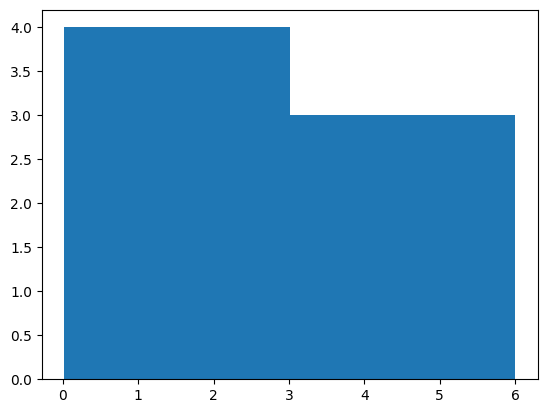

In [20]:
# Para transformar un valor a binario
import matplotlib.pyplot as plt

# Ejemplo de como transformar numeros contínuos a binarios.
print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0, 1]))

# En la imágen muestra cómo divide en 2 grandes bloques los valores. Todo lo que esté entre 0 y 3, lo etiqueta como 0 y lo que
# sea mayor a 3, o etiquetará como 1.
plt.hist([0.04, 0.3, 4, 5, 6, 0.02, 0.6], bins=2)
plt.show()
# Esto es sólo una intuición de cómo vamos a transformar nuestras características de entrada contínuas a valores binarios
# para que pueda entender nuestra neurona M-P

In [21]:
# Transformamos las características de entrada a un valor binario. Aplicamos el método de transformación visto en el paso anterior
# Para hacerlo se usa el método "apply" de los "DataFrames" que es útil a la hora de aplicar una función a todo el conjunto de datos
# de manera simultánea
X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
170,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
326,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15,1,0,1,1,0,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,0
227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
20,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
485,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
225,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
116,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [23]:
# Instanciamos el modelo MPNeuron.
# Una vez que tenemos todos los datos transformados, instanciamos la neurona para usarla
mp_neuron = MPNeuron()

# Encontramos el Threshold óptimo. Y para hacerlo se va a usar el subconjunto de datos de entrenamiento y el subconjunto de datos de pruebas
# que tiene ejemplos que no se encuentran en el de entrenamiento lo deja apartado (no se usa por el momento).
# Como segundo parámetro le pasa "y_train" que son las etiquetas para que pueda comparar
mp_neuron.fit(X_train_bin.to_numpy(), y_train)

In [24]:
# Threshold óptimo seleccionado
mp_neuron.threshold

27

In [26]:
# Para asegurarnos si el algoritmo nos está dando una buena predicción, usamos nuestro conjunto de datos de pruebas que es el "X_test_bin" que tambien transformamos a binario, sin la etiqueta de salida
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento
Y_pred = mp_neuron.predict(X_test_bin.to_numpy())
Y_pred

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [28]:
# Comparamos la predicción del paso anterior, hecha con los conjuntos de prueba.
# Y lo comparamos con el conjunto que sabemos que es real. Esto nos indica que a acertado con
# 83% (0.8391608391608392) de exactitud
accuracy_score(y_test, Y_pred)

0.8391608391608392

In [29]:
# Calculamos la matriz de confusión. También se puede usar ésta matriz para comprobar
# Lo que nos indica es, por un lado, los verdaderos positivos, verdaderos negativos y los falsos positivos.
# Con ésto lo que se obtiene es que
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, Y_pred)
# Con ésto es que ha acertado en 39 casos con 39 ejemplos que se corresponderían con tumores malignos, ha fallado en la
# identificación de 14 que ha identificado como tumores malignos, que serían falsos positivos y que se correspondrían con tumores benignos
# Por otro lado también tenemos falsos negativos, es decir, hemos identificado 9 como tumores benignos que realmente estaban etiquetados
# como malignos y por otro lado, se etiquetaron 81 tumores benignos que efectivamente eran tumores benignos que efectivamente estaban etiquetados
# como benignos.
# Esta es otra forma de evaluar la precisión del algoritmo

array([[39, 14],
       [ 9, 81]])